In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/computed-tomography-ct-of-the-abdomen/files/files',
    seed=42,
    validation_split=.2,
    subset='training',
    batch_size = 32,
    image_size=(224,224)
    )

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/computed-tomography-ct-of-the-abdomen/files/files',
    seed=42,
    validation_split=.2,
    subset='validation',
    batch_size = 32,
    image_size=(224,224)
    )

Found 1428 files belonging to 9 classes.
Using 1143 files for training.
Found 1428 files belonging to 9 classes.
Using 285 files for validation.


In [3]:
classes = train_dataset.class_names

In [4]:
classes

['abdominal_aorta_dilatation',
 'aneurysmal_dilatation_of_aorta',
 'aortic_aneurysm',
 'cancer',
 'formation_of_adrenal_gland',
 'kidney_development',
 'liver_formation',
 'urolithiasis',
 'vertebral_compression_fracture']

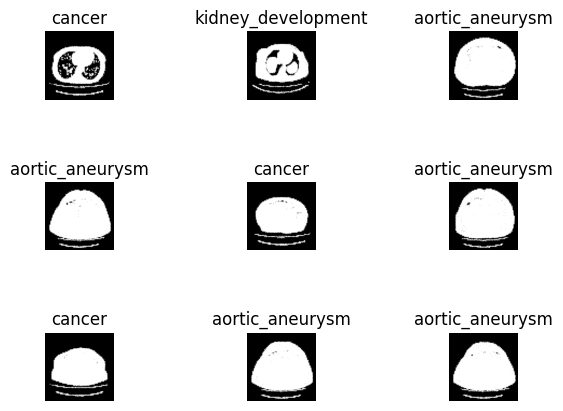

In [10]:
import matplotlib.pyplot as plt
for image, label in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.subplots_adjust(hspace=1.2, wspace=1.2)
        plt.axis('off')
        plt.imshow(image[i])
        plt.title(classes[label[i]])

In [16]:
modelX = hub.KerasLayer('/kaggle/input/mobilenet-v2/tensorflow2/100-224-classification/2', trainable=False, input_shape=(224,224,3))

In [20]:
model_ = tf.keras.Sequential()
model_.add(modelX)
model_.add(tf.keras.layers.Dense(368, activation='relu'))
model_.add(tf.keras.layers.Dropout(.3))
model_.add(tf.keras.layers.Dense(9, activation='softmax'))

In [21]:
model_.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer = 'nadam',
              metrics=['accuracy'])

In [22]:
history = model_.fit(train_dataset,
                    validation_data = validation_dataset,
                    epochs = 6,
                    batch_size = 32,
                    )

Epoch 1/6
36/36 [==============================] - 17s 127ms/step - loss: 1.1782 - accuracy: 0.6387 - val_loss: 0.2346 - val_accuracy: 0.9404
Epoch 2/6
36/36 [==============================] - 2s 56ms/step - loss: 0.1585 - accuracy: 0.9694 - val_loss: 0.0689 - val_accuracy: 0.9930
Epoch 3/6
36/36 [==============================] - 2s 55ms/step - loss: 0.0760 - accuracy: 0.9878 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 4/6
36/36 [==============================] - 2s 58ms/step - loss: 0.0528 - accuracy: 0.9878 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 5/6
36/36 [==============================] - 2s 54ms/step - loss: 0.0340 - accuracy: 0.9983 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 6/6
36/36 [==============================] - 2s 54ms/step - loss: 0.0233 - accuracy: 0.9974 - val_loss: 0.0142 - val_accuracy: 1.0000


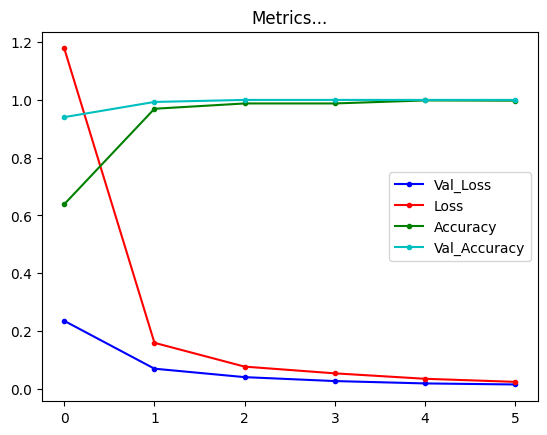

In [29]:
plt.plot(history.history['val_loss'], 'b.-', label='Val_Loss')
plt.plot(history.history['loss'], 'r.-', label='Loss')
plt.plot(history.history['accuracy'], 'g.-', label='Accuracy')
plt.plot(history.history['val_accuracy'], 'c.-', label='Val_Accuracy')
plt.title('Metrics...')
plt.legend()